# **Problema 5.4 MÉTODO COSS BU**

Elaboró: **MARTINEZ PEREA EMILLI ASHLEY**

Una flecha será ensamblada en un cojinte como se muestra a continuación:
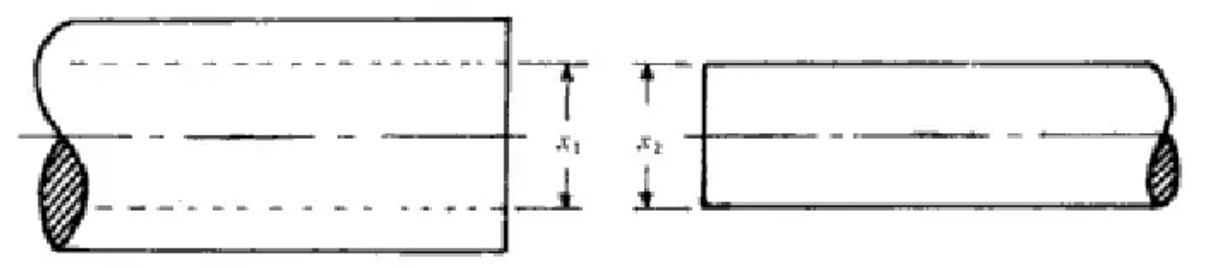


Si $x_1$ sigue una distribución normal con media 1.5 y varianza 0.0016 y $x_2$ sigue esta misma distribución con media 1.48 y varianza 0.0009, determine:


1.   La probabilidad de que haya interferencia
2.   El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%.

# Paso 1
$$x_1 \sim \mathcal{N}(1.5, 0.04)$$
$$x_2 \sim \mathcal{N}(1.48, 0.003)$$

# Paso 2
$x_1 \sim f(x)= \frac{1}{\sqrt{2\pi} (0.004)}$


$x_2 \sim f(x)= \frac{1}{\sqrt{2\pi}(0.003)}e^{\frac{-(x-1.48)^2}{2(0.0009)}}$

# Paso 3

Box-Muller

# Paso 4

Condición de interferencia:
$$x_2 \geq x_1$$
Buscamos:
$$P(x_2 \geq x_1)$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paso 5

In [ ]:
# Experimento de tamaño n; obtenemos las distribuciones normales con los datos del problema donde realizamos el experimento n veces para obtener determinado número de exitos
def experimento(n):
  exitos=0
  for i in range(n):
   x1=np.random.normal(1.5,0.04,1)
   x2=np.random.normal(1.48,0.03,1)
   if x2>=x1: #condicional que representa la interferencia
     exitos += 1

  prob=exitos/n #calculo de la probabilidad del numero de exitos de los n experimentos
  return prob

# Paso 6

In [ ]:
# Repetimos para obtener uns distribución de estimaciones, en este caso el rango mu es la que cantidad de veces que simulamos la probabilidad de realizar n veces el experimento
def muestra(mu, n):
    return [experimento(n) for _ in range(mu)]


# Paso 7
En este paso para repetir el experimento y determinar el tamaño de la muestra,  probamos con distintos valores para n y observamos el intervalo en el que se mantiene estable de ahí selecionaremos el valor fijo de n.

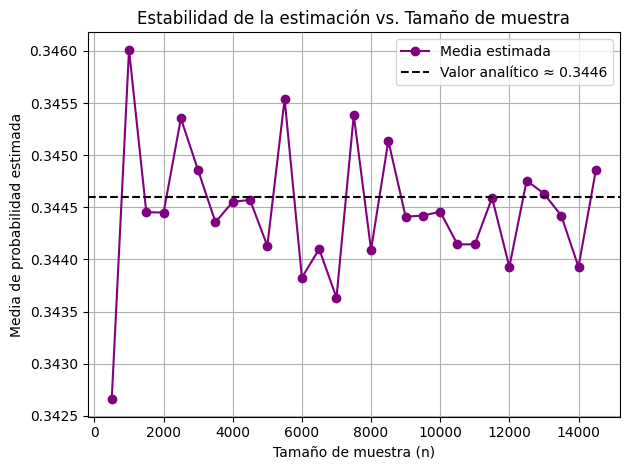

In [38]:
# Valores de n que vamos a evaluar
n_valores = np.arange(500,15000,500)
mu = 100  # Número de repeticiones

resultados=[]
medias = []
errores = []

for n in n_valores:
    resultados=muestra(mu, n)
    media = np.mean(resultados)
    std = np.std(resultados)
    error = 1.96 * std / np.sqrt(mu)

    medias.append(media)
    errores.append(error)

# Gráfica de la estabilidad
plt.plot(n_valores, medias , marker='o', color='purple', label='Media estimada')
plt.axhline(0.3446, color='black', linestyle='--', label='Valor analítico ≈ 0.3446')

plt.title('Estabilidad de la estimación vs. Tamaño de muestra')
plt.xlabel('Tamaño de muestra (n)')
plt.ylabel('Media de probabilidad estimada')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NOTA: SE TOMA LA MEDIA DEL NUMERO DE CORRIDAS PARA TENER UN VALOR REPRESENTATIVO Y SE COMPARA CON LA MEDIA TEORICA (PROBABILIDAD CALCULADA TEORICAMENTE)

Para tener mayor certeza del valor a emplear en el tamaño de muestra, observaremos la gráfica del error de la media teorica y la media simulada.


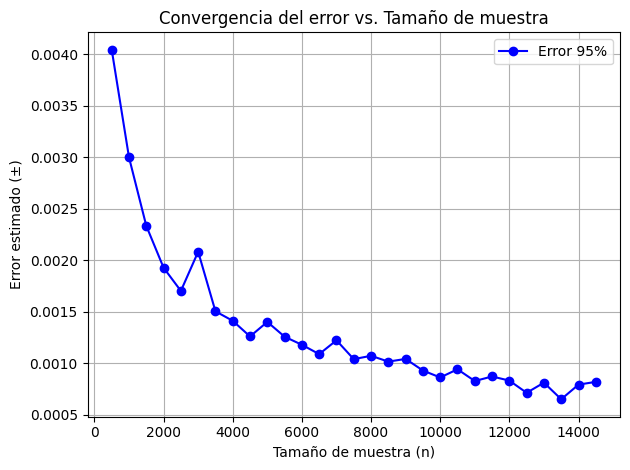

In [39]:
# Graficar el error vs. tamaño de muestra
plt.plot(n_valores, errores, marker='o', color='blue', label='Error 95%')

plt.title('Convergencia del error vs. Tamaño de muestra')
plt.xlabel('Tamaño de muestra (n)')
plt.ylabel('Error estimado (±)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-40-3929177fdfeb>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


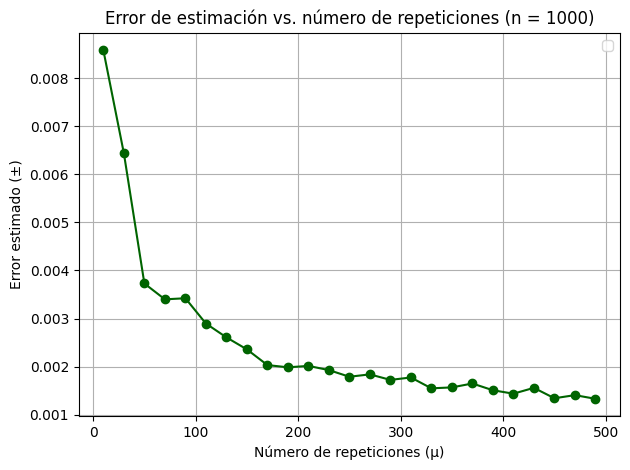

In [40]:
# Repite el experimento mu veces y regresa media y error
def error_vs_mu(mu_lista, n_fijo):
    medias = []
    errores = []
    for mu in mu_lista:
        resultados = [experimento(n_fijo) for _ in range(mu)]
        media = np.mean(resultados)
        std = np.std(resultados)
        error = 1.96 * std / np.sqrt(mu)
        medias.append(media)
        errores.append(error)
    return medias, errores

# Parámetros de prueba
mu_valores = np.arange(10, 510, 20)  # De 10 a 500 en pasos de 20
n_fijo = 1000  # Tamaño de muestra fijo

medias, errores = error_vs_mu(mu_valores, n_fijo)

# Gráfica
plt.plot(mu_valores, errores, marker='o', color='darkgreen')
plt.title(f'Error de estimación vs. número de repeticiones (n = {n_fijo})')
plt.xlabel('Número de repeticiones (μ)')
plt.ylabel('Error estimado (±)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Después de nuestro analisis, elegimos convenientemente los valores n=8700 para el número de experimentos y mu=100 para el número de simulaciones.
Simulamos, graficamos y obtenemos la media de la distribución que nos dará el valor de la probabilidad.

Media estimada: 0.3441
La probabilidad de interferencia es 34.405%
Con una confianza del 95%: ±0.0010
Intervalo de confianza (95%): [0.3430, 0.3451]


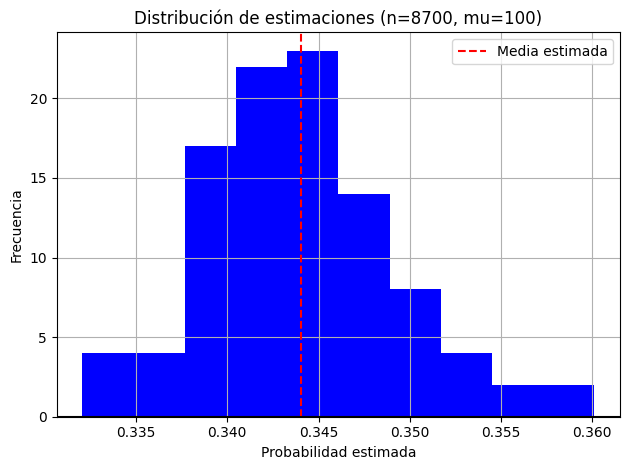

In [ ]:
# Parámetros
mu = 100        # Número de veces que se repite el experimento
n = 8700        # Tamaño de muestra en cada experimento

# Ejecutar simulación
resultados = muestra(mu, n)

# Estadísticas
media = np.mean(resultados)
desviacion = np.std(resultados)
error_95 = 1.96 * desviacion / np.sqrt(mu)

# Mostrar resultados

print(f"Media estimada: {media:.4f}")
print(f"La probabilidad de interferencia es {round(media*100, 3)}%")
print(f"Con una confianza del 95%: ±{error_95:.4f}")
print(f"Intervalo de confianza (95%): [{media - error_95:.4f}, {media + error_95:.4f}]")

# Graficar resultados
plt.hist(resultados, bins=10, color='blue')
plt.axvline(x=media, color='red', linestyle='--', label='Media estimada')
plt.axhline(y=0, color='black')
plt.title(f'Distribución de estimaciones (n={n}, mu={mu})')
plt.xlabel('Probabilidad estimada')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Probabilidad de interferencia analíticamente:
Queremos obtener
$$P(x_2 \ge x_1) = P(x_2 - x_1 \ge 0)$$
Por el Teorema del Límite central
$$x_2 - x_1 \sim \mathcal{N}\left(\mu_2 - \mu_1, \sqrt{\sigma_2^2 + \sigma_2^2}\right)$$
Así
$$Z = \frac{x_2 - x_1 - (\mu_2 - \mu_1)}{\sqrt{\sigma_2^2 + \sigma_1^2}} \sim \mathcal{N}(0, 1)$$
Luego
$$P(x_2 - x_1 \ge 0) = P\left(\frac{x_2 - x_1 - (\mu_2 - \mu_1)}{\sqrt{\sigma_2^2 + \sigma_1^2}} \ge \frac{ - (\mu_2 - \mu_1)}{\sqrt{\sigma_2^2 + \sigma_1^2}}\right) = P\left(Z \ge \frac{ \mu_1 - \mu_2}{\sqrt{\sigma_2^2 + \sigma_1^2}}\right)$$
Sustituyendo nuestros valores, queremos calcular
$$P(Z \ge 0.4) = \int_{0.4}^\infty \frac{1}{\sqrt{2\pi}}e^{-z^2/2}dz$$

# Inciso B)

# Número de veces de simulación del experimento para que $E < 0.01$

Tenemos que
$$E = \frac{Z_{\alpha/2}\hat{s}}{\sqrt{n}}$$
Y queremos
$$E < \epsilon$$
Así
$$\frac{Z_{\alpha/2}\hat{s}}{\sqrt{n}} < \epsilon$$
$$\rightarrow n > \left(\frac{Z_{\alpha/2}\hat{s}}{\epsilon}\right)^2$$

In [37]:
from math import ceil, sqrt

# Parámetros conocidos
z = 1.96         # z para 95% de confianza
p = 0.3446       # probabilidad estimada de interferencia
E = 0.01         # error máximo permitido

# Cálculo del tamaño de muestra
n_repeticiones = ceil((z * sqrt(p * (1 - p)) / E) ** 2)

print(f"Se necesitan al menos {n_repeticiones} repeticiones para asegurar un error menor a 0.01 con 95% de confianza.")

Se necesitan al menos 8677 repeticiones para asegurar un error menor a 0.01 con 95% de confianza.
